# Visualisation

## Setup

In [5]:
import os
import pydicom
import matplotlib.pyplot as plt

import SimpleITK as sitk


In [2]:
def plot_dcm_slices(root, files, num_column=15, jump=1):
    num_slices = len(files)
    num_row = (num_slices//jump + num_column - 1) // num_column
    f, plots = plt.subplots(num_row, num_column, figsize=(10, 6))
    for i in range(0, num_row*num_column):
        plot = plots[i % num_column] if num_row == 1 else plots[i // num_column, i % num_column]        
        plot.axis('off')
        if i < num_slices//jump:
            file = os.path.join(root, files[i*jump])
            ds = pydicom.dcmread(file)
            plot.imshow(ds.pixel_array, cmap=plt.cm.bone)  # set the color map to bone

In [12]:
def plot_ct_scan(scan, num_column=15, jump=1):
    num_slices = len(scan)
    num_row = (num_slices//jump + num_column - 1) // num_column
    f, plots = plt.subplots(num_row, num_column, figsize=(10, 6))
    for i in range(0, num_row*num_column):
        plot = plots[i % num_column] if num_row == 1 else plots[i // num_column, i % num_column]        
        plot.axis('off')
        if i < num_slices//jump:
            plot.imshow(scan[i*jump], cmap=plt.cm.bone) 

## Original Data

In [3]:
DATA_PATH = "./data/"
dcmFolders = []
filesLst = []
for root, dirs, files in os.walk(DATA_PATH):
    if (len(files) != 0):
        for file in files:
            if file.endswith("dcm"):
                dcmFolders.append(root)
                filesLst.append(files)
                break

dcmFolders

['./data/LIDC-IDRI\\LIDC-IDRI-0001\\01-01-2000-NA-NA-30178\\3000566.000000-NA-03192']

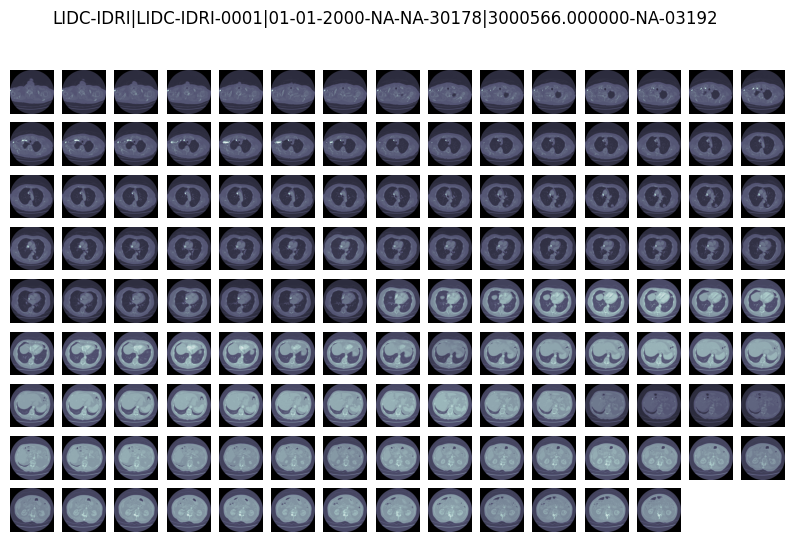

In [4]:
# pop non DICOM file
files = []
for i in filesLst[0]:
    if i.endswith("dcm"):
        files.append(i)

plot_dcm_slices(root=dcmFolders[0], files=files)
plt.suptitle(dcmFolders[0][7:].replace("\\", '|'))
plt.savefig("./imgs/DCMSlices.png", bbox_inches="tight")
plt.show()

## Mask

In [7]:
prefix = "./data/Mask-LIDC-IDRI/LIDC-IDRI-0001_01-01-2000-NA-NA-30178_3000566.000000-NA-03192_outMultiLabelMask"
mhd_file = prefix + ".mhd"
data =sitk.ReadImage(mhd_file)
print(data)

Image (0000027333027A30)
  RTTI typeinfo:   class itk::Image<short,3>
  Reference Count: 1
  Modified Time: 2068
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 2038
  UpdateMTime: 2064
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 133]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 133]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 133]
  Spacing: [0.703125, 0.703125, 2.5]
  Origin: [-166, -171.7, -10]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.703125 0 0
0 0.703125 0
0 0 2.5

  PointToIndexMatrix: 
1.42222 0 0
0 1.42222 0
0 0 0.4

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0000027335A35990)
      RTTI typeinfo:   class itk::ImportImageContainer<unsigned __int64,sh

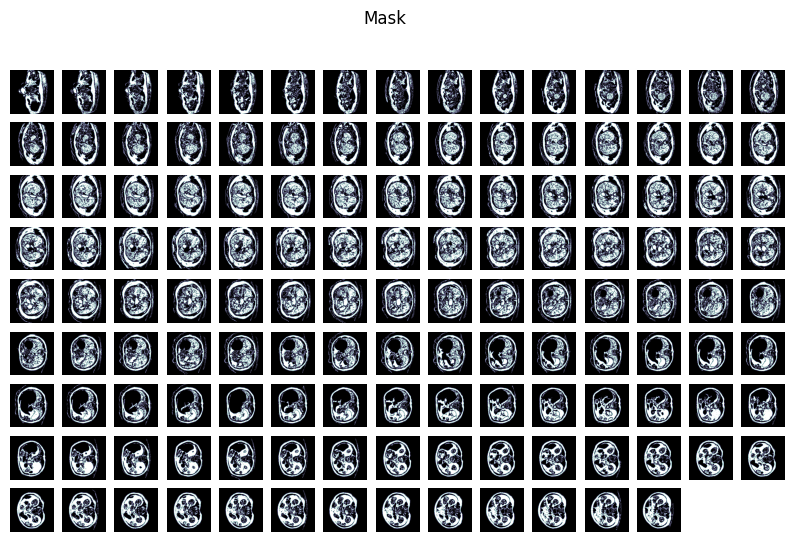

In [14]:
scan = sitk.GetArrayFromImage(data)
plot_ct_scan(scan)
plt.suptitle("Mask")
plt.savefig("./imgs/Mask.png", bbox_inches="tight")

## X-Ray

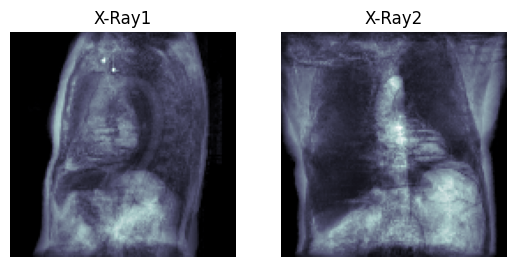

In [32]:
import matplotlib.image as mpimg

dir = "./data/Test-LIDC-IDRI/LIDC-IDRI-0001_01-01-2000-NA-NA-30178_3000566.000000-NA-03192"
xray1 = os.path.join(dir, "xray1.png")
fig, axes = plt.subplots(1, 2)
for i in range(2):
    im = mpimg.imread(os.path.join(dir, f"xray{i+1}.png"))
    axes[i].set_title(f"X-Ray{i+1}")
    axes[i].axis("off")
    axes[i].imshow(im, cmap=plt.cm.bone)
plt.savefig("./imgs/xrays.png", bbox_inches="tight")